# Model to Predict House Prices

**Rudy Meza**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

Using the AMES Housing Dataset, I implemented a linear regression model to predict housing prices. Feature selection was used using the LASSO regression model. These features were implemented in the linear regression model. The resulting score of the model was 85% accuracy. The top selected features were the size of the property, location, property type, and quality of the property. Further analysis can be used to increase the model score, such as transformations, bins, polynomials, and differencing.

[Back to top](#Index)


## 1. Introduction




The following analysis will take a look at the AMES Housing dataset. The goal is to build a model to predict house prices. To do this, we must perform an Exploratory Data Analysis (EDA) of our data. This includes a few charts to see what the distribution of housing looks like and view counts for specific categorical variables. Since many variables exist, a feature selection algorithm is known as the Least Absolute Shrinkage and Selection  (LASSO) Regression model. We will pick a few features from the model and use these as predictors for the regression model.<br> First, we need to preprocess the data and create a pipeline to do this, which includes the following steps:
*  OneHOtEncoder-Create indicator variables for all our categorical variables. Later, the get_dummies function will do this for the linear regresison model.
*  Scale - Apply a scaler to all out predictors in the training dataset. This is required for the LASSO model.
*  Cross Validation- This is needed to test how our model performs for different subsets of the data and variable selection
*  Fit and Assess final model- We will fit on the training and testing of the dataset. 
*  Extarct Features - extarcts the important features from the LASSO model
*  Apply the Linear Regression model
*  Assess the final results

[Back to top](#Index)

## 2. The Data

 

[Back to top](#Index)

### 2.1 Import the Data



In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import os
import glob

In [46]:

# Here I'm looking insdie my current directory to pull the housing data
# Next, I will read in as a pandas dataframe

dir = os.getcwd()


file = "".join(glob.glob(os.path.join(dir, "houseSmallData.csv")))

df = pd.read_csv(file)



[Back to top](#Index)

### 2.2 Data Exploration



In [3]:
# Let's see the columns
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [4]:
# Shape
df.shape

(100, 82)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  OverallQual

'The average sales price is : 173820.66 and The median sales price is : 153750.0'

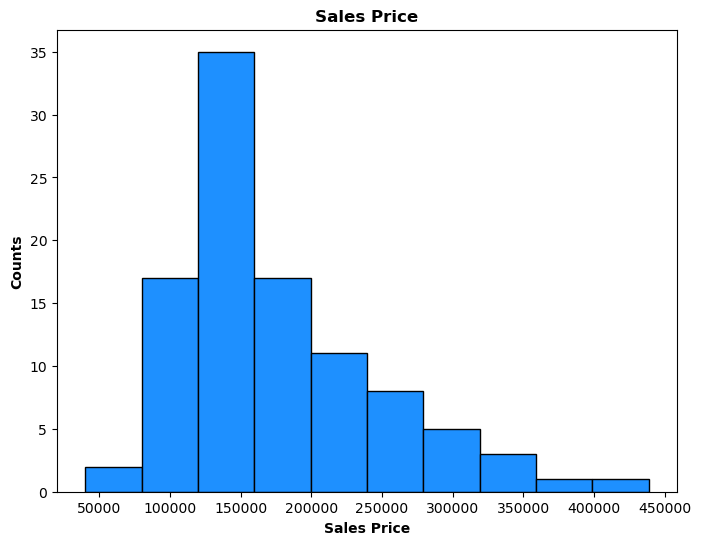

In [5]:
# Distribution of Sales Price
y = df['SalePrice']
plt.figure(figsize = (8,6))

plt.hist(y, color = 'dodgerblue', edgecolor = 'black');
plt.title('Sales Price', fontweight = 'bold');
plt.xlabel("Sales Price",fontweight = 'bold');
plt.ylabel('Counts',fontweight = 'bold');




f'The average sales price is : {np.mean(y)} and The median sales price is : {np.median(y)}'



There is a right skew on the sales price. This is also confirmend by the mean and median price at the top. When a right skew exists, <br>
the mean is greater than the median.<br>
We can see that the hgihest prices are around $450,000

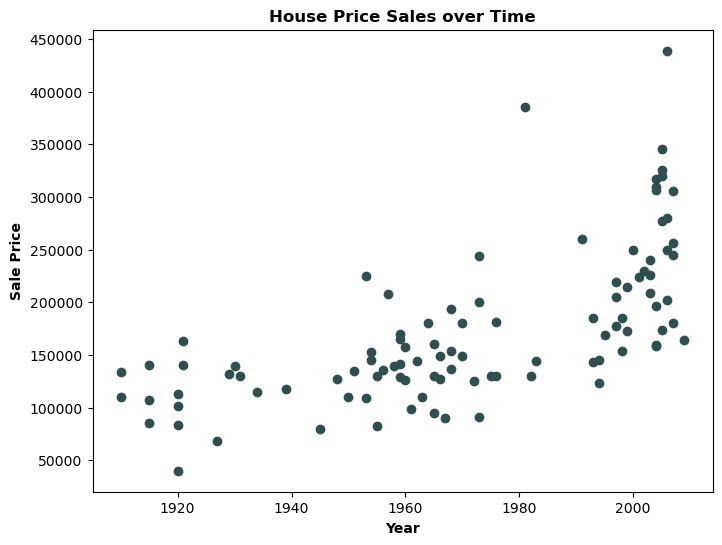

In [6]:
y = df['SalePrice']
x = df['YearBuilt']
plt.figure(figsize = (8,6))

plt.scatter(x,y, color = 'darkslategray');
plt.title('House Price Sales over Time', fontweight = 'bold');
plt.xlabel("Year",fontweight = 'bold');
plt.ylabel('Sale Price',fontweight = 'bold');

We can see that in general, the sales price of a house is increasing over time. The relationship is postive between year built and sales price.<br>
What about the location of the house?

In [7]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr'], dtype=object)

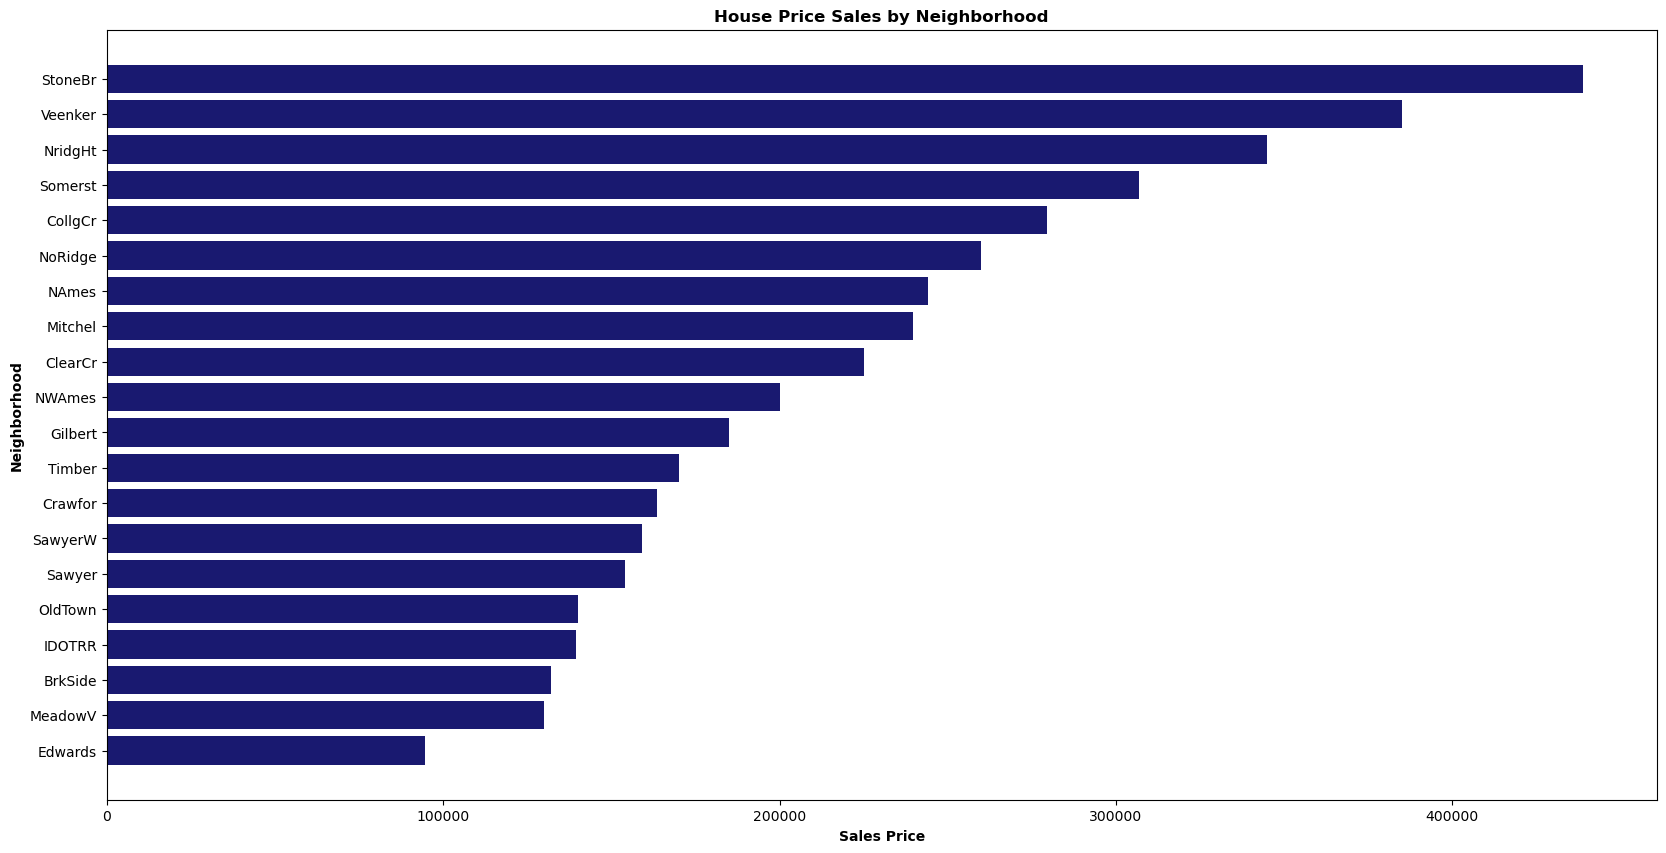

In [8]:


plt_df = df[['SalePrice', 'Neighborhood']]
plt_df = plt_df.sort_values(by = "SalePrice", ascending = False)


plt.figure(figsize = (20,10))
plt.barh(plt_df['Neighborhood'],plt_df['SalePrice'], color = 'midnightblue');
plt.gca().invert_yaxis();
plt.title('House Price Sales by Neighborhood', fontweight = 'bold');
plt.xlabel("Sales Price",fontweight = 'bold');
plt.ylabel('Neighborhood',fontweight = 'bold');

From above, we can see there are specific neighborhoods that have a higher sales price. This could be due to the location of the property, size, or <br> number of bathrooms. Stonebr has the highest counts with sales price around **$400,000** amd Edwards has the lowest counts with a sales price of less than **$100,000**

[Back to top](#Index)

### 2.3 Data Preparation



In [9]:
missing = df.isna().sum()
missing[missing>0]

df.dropna(axis=1, inplace=True)

In [10]:
categories = df.select_dtypes('object').columns.tolist()

Going to drop all na values from the dataset. Due to the lengthy dataset, I'm going to apply a Penalized Regression Technique <br> to select the best variables using the LASSO Regression model. We have now dropped to 66 columns from our original 80<br>
Above, we have created "Dummy" variables for the model. We also had to bind these new columns to the original dataframe <br> and drop the original columns. Our new df is called main.<br> We are checking to make sure we don't have any categorical data. We don't!

In [11]:
from ISLP.models import ModelSpec as MS

design = MS(df.columns.drop('SalePrice')).fit(df)
Y = np.array(df['SalePrice'])
X = design.transform(df)

The ModelSpec (MS) is a design matrix for regression and classification.<br>
Here we are setting up our matrix of X's for the lasso model.<br>
We then create our ouput Y variable as an array.<br>

In [12]:
import sklearn.model_selection as skm



X_train,X_test, y_train, y_test = skm.train_test_split(X,Y,test_size = 0.2, random_state=43)

Above, we are going to split our data into training and testing sets by 80/20 split.<br>
Next, we are going to set our K Fold Splits. The data will be shuffled befor splitting.<br>
Lastly, we are standarizing the data.<br>

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

K=10
kfold = skm.KFold(K,
random_state=0,
shuffle=True)
scaler = StandardScaler(with_mean=True,  with_std=True)

ohe = make_column_transformer(
    (OneHotEncoder(),categories),
    remainder = 'passthrough'
)

lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('encoder',ohe),('scaler', scaler),
                         ('lasso', lassoCV)])

Begin our Cross Validation followed by tunning our model

In [14]:
pipeCV.fit(X_train, y_train)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['MSZoning', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'Heating', 'HeatingQC',
                                                   'CentralAir', 'Electrical',
                                                   'KitchenQual', 'Functional',
                                                   'PavedDrive', 'SaleType',
                                                   'SaleCondition'])])),
                ('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
                              l1_ratio=1))])

In [15]:
pipeCV.fit(X_train,y_train)
tuned_lasso = pipeCV.named_steps['lasso']


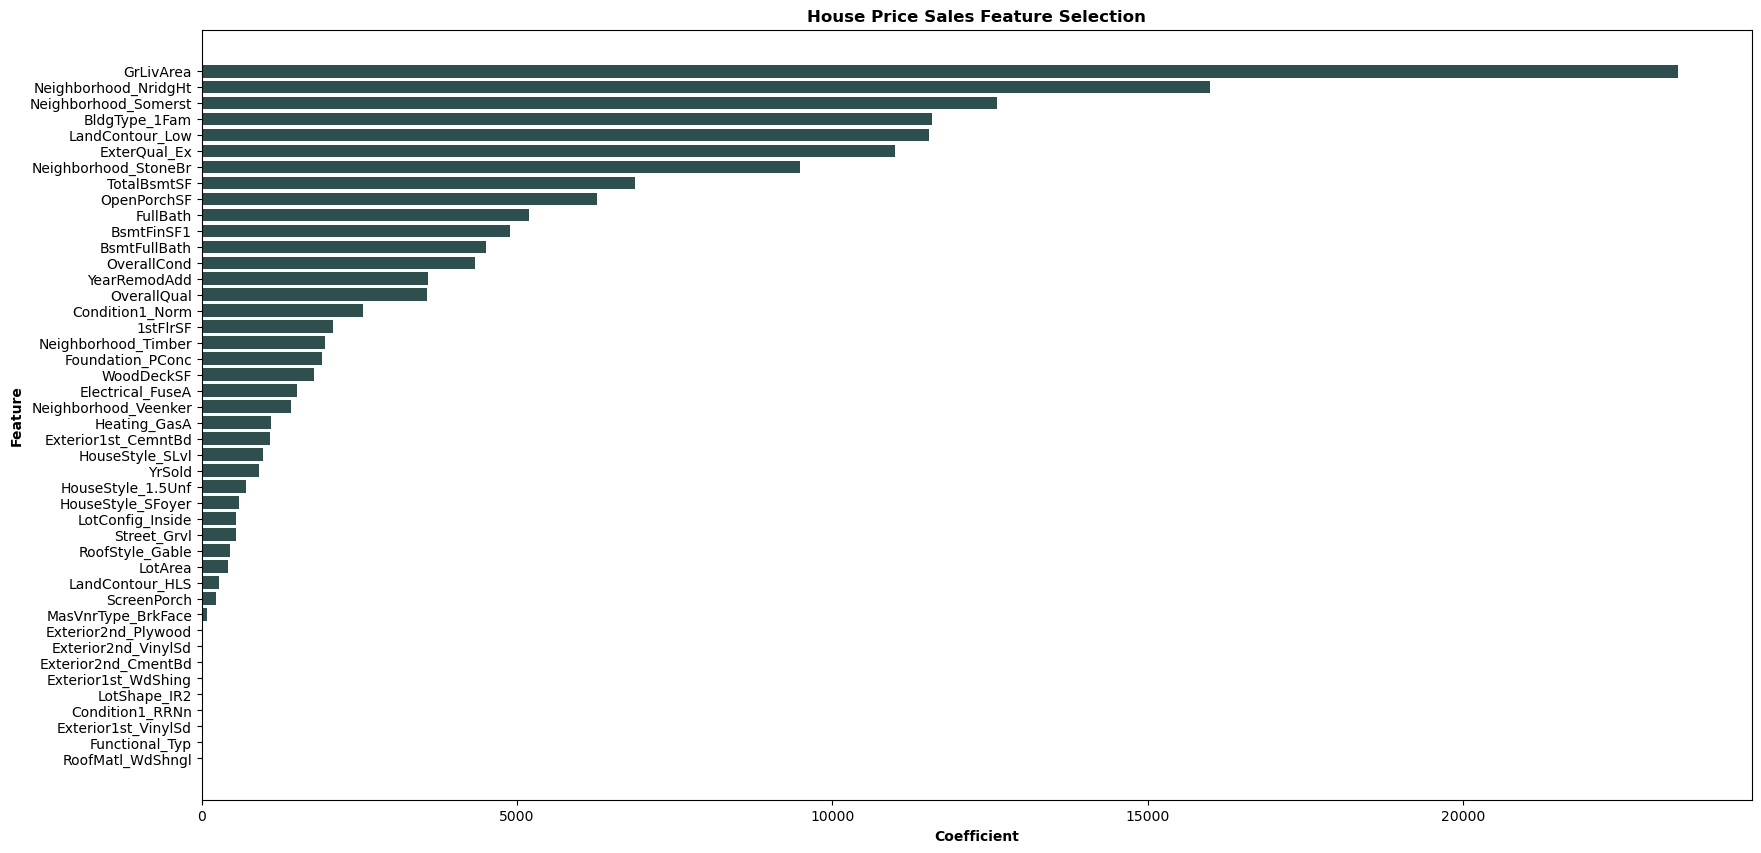

In [16]:
features = pipeCV.named_steps['encoder'].get_feature_names_out()
features = [item.split('__',1) [1] if '__' in item else item for item in features]
coefs = tuned_lasso.coef_
zipped = list(zip(features, coefs))
plt_df = pd.DataFrame(zipped,
    columns = ['features','values'])

plt_df = plt_df[plt_df['values']>0]
plt_df = plt_df.sort_values(by = 'values')
plt.figure(figsize = (20,10))
plt.barh(plt_df['features'],plt_df['values'],
    color = 'darkslategray');


plt.title('House Price Sales Feature Selection', fontweight = 'bold');
plt.xlabel("Coefficient",fontweight = 'bold');
plt.ylabel('Feature',fontweight = 'bold');

We can see that neighborhood, building type, wood deck, grlivearea, landcontour, exterqual. I'm going to apply this to the regression model <br> to see how this performs

[Back to top](#Index)

### 2.4 Correlation



In [17]:
cols = [ele for ele in X_train.columns if ele in features]

numeric = X_train[cols].select_dtypes(include = [np.number])
corr = pd.concat([pd.DataFrame(y_train, columns = ['SalePrice']),numeric], axis =1).corr()
output = corr['SalePrice'].sort_values(ascending = False)[0:10]
output

SalePrice       1.000000
MSSubClass      0.186386
BsmtFinSF2      0.159832
YrSold          0.114169
BsmtFullBath    0.093209
OpenPorchSF     0.092256
BsmtUnfSF       0.083427
MoSold          0.076475
Unnamed: 0      0.066898
Id              0.066898
Name: SalePrice, dtype: float64

We can see our TOP 10 correlation series. However, we don't see our categorical variables from our initial LASSO Regression model. These may be more important factors. We will compare these later.


[Back to top](#Index)

## 3. Project Description


The Ames dataset has high cardinality regarding columns. There are many columns with different categories. One way to approach this is to run a penalized regression.<br> The LASSO deals with this issue by performing feature selection. The LASSO regression model will 'zero out' certain features as the penalty term increases for each model produced. Once complete, we choose the best model and certain features for that specific model.<br>

I selected the following from the LASSO Regression Model Features: neighborhood, building type, wood deck, grlivearea, land contour, external.
These will be the variables to include in my Linear Regression model. All of these were of high importance from the feature selection plot above. My analysis will take a naive approach; there are many more techniques to apply to the model, such as interactions, transformations, and polynomials. <br>
Overall, my results showed that I increased the model score for the training set to 95% and my testing for the jtest data to 85%.


[Back to top](#Index)

### 3.1 Linear Regression



$$Y_{i} = \beta_{0} + \beta_{i}X_{i} + \epsilon_{i}
$$

The linear regression method is a statistical method used to assess the relationship of continuous variables. When we use more than one predictor variable, the regression model becomes a multiple regression model. <br>There are assumptions that have to be followed in order to extract statistical inference: LINE

* Assumption 1: The mean of the response, Y, is a linear function of the predictors
* Assumption 2: The errors are independent (Autocorrelation)
* Assumption 3: The errors are Normally Distributed
* Assumption 4: The errors have an equal variance (Homoskedasticity)

With these assumption, we can make statistical inference from a hypothesis test regarding certain data and questions.

We can also predict!


In order to implement in Python, the following must be met.<br>
1.  import the libraries (Pandas, Numpy, SKLearn)
2.  Change the data or preprocess for categorical, NA's, and scale transformations such as a natural log
3.  fit the model- split the Y and X variables (verify the number of rows is the same for each split)
4.  Split the data into training and testing
5.  Assess the model fit(R2, MSE, Model Score)
6.  Run analysis on testing split




[Back to top](#Index)

### 3.2 Analysis 





In [18]:
subset = X_train[['Neighborhood', 'LandContour','Condition1','ExterQual','GrLivArea','WoodDeckSF','BldgType']]
X = pd.get_dummies(data = subset, drop_first = True)
X.head()

,GrLivArea,WoodDeckSF,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
44,1150,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
12,912,140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
78,1768,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
94,1786,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
37,1297,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [19]:
corr = pd.concat([pd.DataFrame(y_train, columns = ['SalePrice']),X], axis =1).corr()
output = corr['SalePrice'].sort_values(ascending = False)[0:10]
output

SalePrice               1.000000
BldgType_Twnhs          0.406824
Neighborhood_MeadowV    0.281045
Condition1_RRAn         0.239930
Condition1_PosA         0.226573
ExterQual_Fa            0.119714
Condition1_RRNn         0.119714
Neighborhood_NAmes      0.098399
Neighborhood_OldTown    0.085985
Neighborhood_Sawyer     0.069372
Name: SalePrice, dtype: float64

We can see all positive correlations with our categorical variables. The categorical variable BldgType has the strongest correlation with SalePrice

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y_train)

LinearRegression()

In [21]:
predictions = model.predict(X)
model.score(X,y_train)

0.9560802381848464

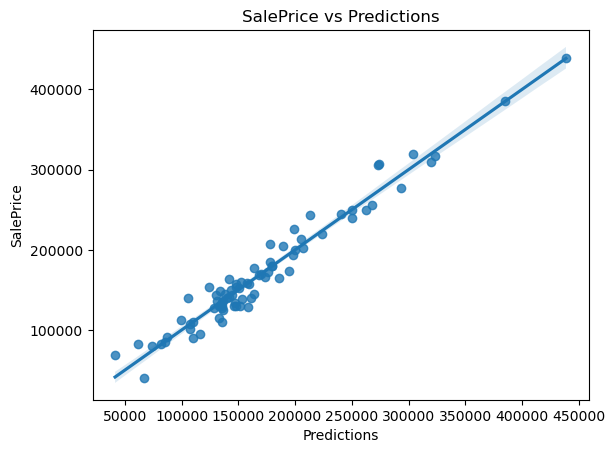

In [22]:
import seaborn as sns
plot = sns.regplot(y = y_train,x = predictions)
plot.set(xlabel = "Predictions", ylabel = 'SalePrice', title = 'SalePrice vs Predictions')
plt.show()


In [23]:
final = X_test[['Neighborhood', 'LandContour','Condition1','ExterQual','GrLivArea','WoodDeckSF','BldgType']]
main = pd.get_dummies(data = final, drop_first = True)
model.fit(main,y_test)
f'The final score for the OLS Model : {model.score(main,y_test)}'

'The final score for the OLS Model : 0.9448291622455852'

[Back to top](#Index)

### 3.3 Results



The specific important features from the horizontal bar chart in section 2.3 show GrLivArea as the highest importance. This is the size of the property above ground (SQFT). Next is the neighborhood. <br>
The location of the property will always affect the market price. We expect a home located next to a lake, compared to a house not next to a lake, to have a higher sales price. Another key variable is BldgType. This is the type of property that is sold. Like HouseStyle, this includes townhomes, single-family, duplexes, and two-family conversions. The last important feature I'll discuss is the ExterQual. This is the exterior quality of the property. A property in excellent condition will attract potential buyers, but not a property that needs much work.<br><br>
The final analysis culminates in a scatter plot, juxtaposing our Training  Sales Price against Predictions. The strong correlation and proximity of the points to the regression line affirm the accuracy of our model. Notably, our final test score of 94% is slightly lower than the training score, a positive sign when assessing overfitting. This further underscores the robustness of the LASSO regression model in our analysis, instilling confidence in its reliability.




[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data



In [24]:
file2 = "".join(glob.glob(os.path.join(dir, "jtest.csv")))

test = pd.read_csv(file2)

In [25]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [26]:
final2 = test[['Neighborhood', 'LandContour','Condition1','ExterQual','GrLivArea','WoodDeckSF','BldgType','SalePrice']]
final2.dropna(axis=1, inplace=True)
main2 = pd.get_dummies(data = final2, drop_first = True)
Y = np.array(main2['SalePrice'])
main2.drop('SalePrice', axis = 1, inplace = True)
model2 = LinearRegression()
model2.fit(main2,Y)
f'The final score for the OLS Model : {model2.score(main2,Y)}'

C:\Users\rudym\AppData\Local\Temp\ipykernel_2968\3744390046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2.dropna(axis=1, inplace=True)


'The final score for the OLS Model : 0.858568436656645'

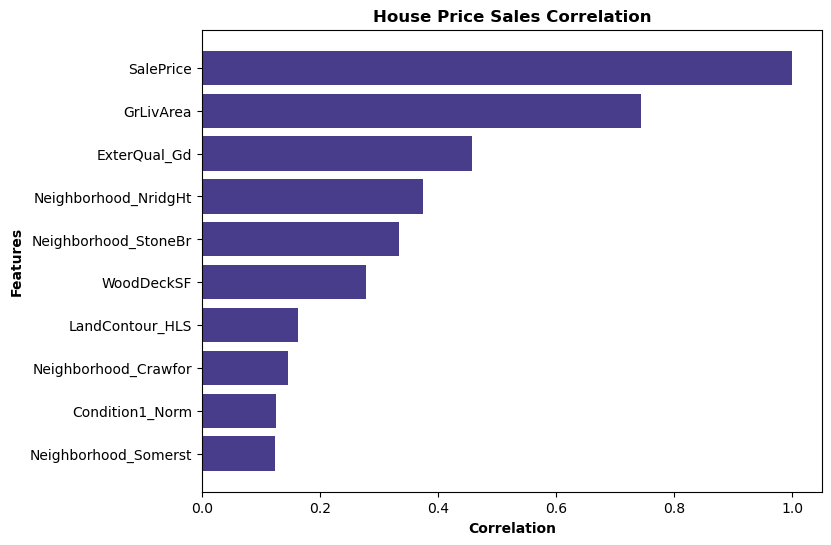

In [44]:
import seaborn as sns
corr2 = pd.get_dummies(data = final2, drop_first = True).corr()
output2 = corr2['SalePrice'].sort_values(ascending = False)[0:10]
names = output2.index
plot1 = output2.to_frame().reset_index()
sub = pd.get_dummies(data = final2, drop_first = True)
sub = sub[names]

plt.figure(figsize = (8,6))
plt.barh(plot1['index'],plot1['SalePrice'],
    color = 'darkslateblue');
plt.gca().invert_yaxis();
plt.title('House Price Sales Correlation', fontweight = 'bold');
plt.xlabel("Correlation",fontweight = 'bold');
plt.ylabel('Features',fontweight = 'bold');

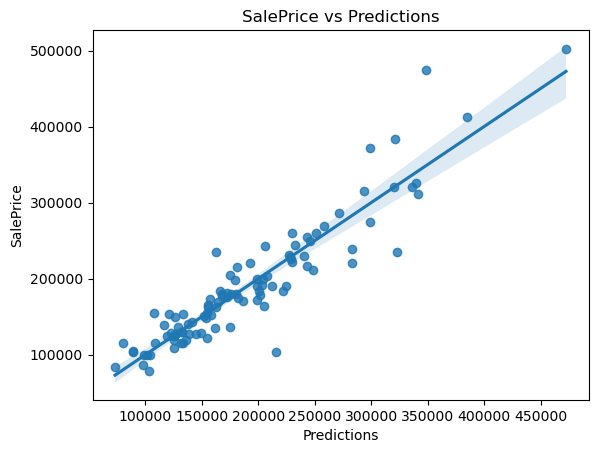

In [579]:
import seaborn as sns
predictions2 = model2.predict(main2)
plot = sns.regplot(y = Y,x = predictions2)
plot.set(xlabel = "Predictions", ylabel = 'SalePrice', title = 'SalePrice vs Predictions')
plt.show()

[Back to top](#Index)

## Conclusion

The results above show that dealing with 'High Cardinality' data can benefit from using the LASSO Regression model. This specific model implements feature selection. We can extract and apply those particular features to the linear regression model. Our final results show a model score of 85%. This is an improvement and more realistic since it's less than our training score of 95%. The latter is a vital sign of overfitting. Overfitting isn't an issue with the jtest results. We expect our testing score to underperform our training score. If there were opposite results, then I would be concerned with overfitting. Lastly, the final scatter plot above compares SalePrice and Predictions regarding the test data. We still see a strong, positive correlation. But, the data points are farther from the regression line than the training. Overall, the model does an excellent job of predicting.





[Back to top](#Index
)
## References


Use this format for articles:
- James, Gareth, et al. An Introduction to Statistical Learning: With Applications in Python. Springer, 2023. 


Use this format for websites:
- Author Simon, Laura and Young, Derek. “STAT 501” Name of Website. 2024. https://online.stat.psu.edu/stat501/ .



In [1]:
!jupyter nbconvert  Module_7_Final_Project_Template.ipynb --to html

[NbConvertApp] Converting notebook Module_7_Final_Project_Template.ipynb to html
[NbConvertApp] Writing 1110600 bytes to Module_7_Final_Project_Template.html
